In [27]:
# Import des librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
import joblib
from IPython.display import display

In [9]:
input_csv = r"C:/Users/vikne/Documents/Master 2/Semestre 9/Intelligence artificielle/Travel-Order-Resolver/ai/nlp/dataset/text/text_lang_detector.csv"
df = pd.read_csv(input_csv, sep=";")
df.head()

,sentence,is_not_french
0,Y a-t-il un moyen d'aller de Montreux-Vieux à ...,0
1,I would like to travel from culoz to buswiller...,1
2,He lied when he said he didn't like her.,1
3,?N|ajOLIY6;DOM'mKavLZZnkAi,0
4,a(c}sMyu7/97.[-IA@m k0rN0U,0


In [12]:
def preprocess_data(df):
    X = df['sentence']
    y = df['is_not_french']
    
    return X, y

input_csv = r"C:/Users/vikne/Documents/Master 2/Semestre 9/Intelligence artificielle/Travel-Order-Resolver/ai/nlp/dataset/text/text.csv"
df = pd.read_csv(input_csv, sep=";")

X, y = preprocess_data(df)

print(X.head())
print(y.head())

0    Y a-t-il un moyen d'aller de Montreux-Vieux à ...
1    I would like to travel from culoz to buswiller...
2             He lied when he said he didn't like her.
3                           ?N|ajOLIY6;DOM'mKavLZZnkAi
4                           a(c}sMyu7/97.[-IA@m k0rN0U
Name: sentence, dtype: object
0    0
1    1
2    1
3    0
4    0
Name: is_not_french, dtype: int64


In [13]:
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

print(f"Taille de l'ensemble d'entraînement : {len(X_train)}")
print(f"Taille de l'ensemble de test : {len(X_test)}")

Taille de l'ensemble d'entraînement : 1041396
Taille de l'ensemble de test : 260349


In [19]:
pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())

def train_and_predict(X_train, y_train, X_test):
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    
    return y_pred, pipeline

y_pred, model = train_and_predict(X_train, y_train, X_test)

print("Prédictions sur l'ensemble de test :")
print(y_pred)

Prédictions sur l'ensemble de test :
[0 1 1 ... 0 0 0]


In [20]:
def evaluate_model(y_test, y_pred):
    print("### Classification Report ###")
    print(classification_report(y_test, y_pred))
    
    print("### Accuracy ###")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

evaluate_model(y_test, y_pred)

### Classification Report ###
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    183170
           1       0.99      0.99      0.99     77179

    accuracy                           0.99    260349
   macro avg       0.99      0.99      0.99    260349
weighted avg       0.99      0.99      0.99    260349

### Accuracy ###
Accuracy: 0.9945


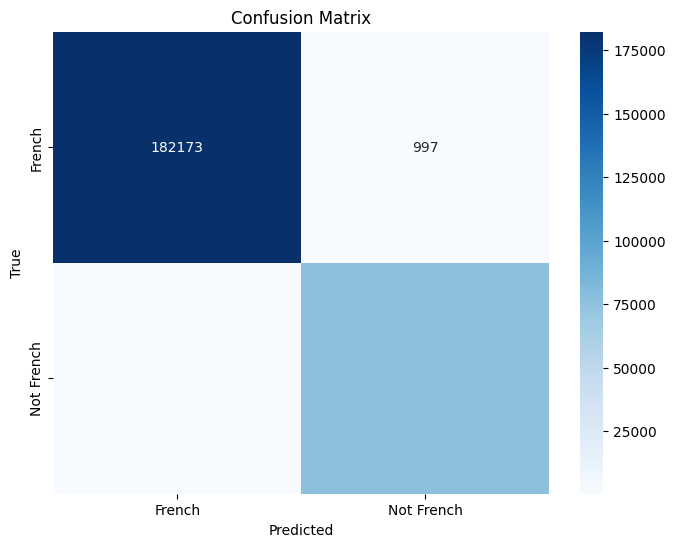

In [21]:
def plot_confusion_matrix(y_test, y_pred):
    # Calcul de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    
    # Création du graphique de la matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["French", "Not French"], yticklabels=["French", "Not French"])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Exemple d'utilisation avec y_test et y_pred
plot_confusion_matrix(y_test, y_pred)


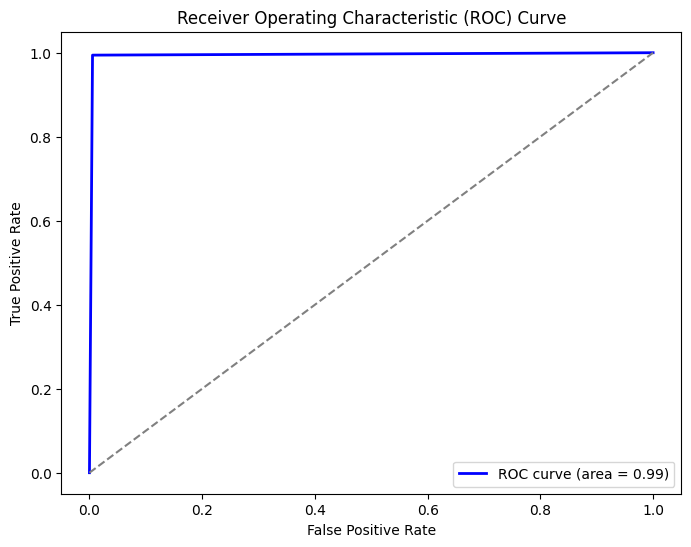

F1 Score: 0.9907
AUC: 0.9944


In [23]:
from sklearn.metrics import f1_score

def plot_metrics(y_true, y_pred):
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Affichage du F1 Score et du AUC
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"AUC: {roc_auc:.4f}")

plot_metrics(y_test, y_pred)

In [ ]:
model_path = r"C:/Users/vikne/Documents/Master 2/Semestre 9/Intelligence artificielle/Travel-Order-Resolver/ai/nlp/models/text_classification/lang_detector/naive_bayes_lang_detection.pkl"
joblib.dump(pipeline, model_path)

print(f"Modèle sauvegardé dans : {model_path}")

Modèle sauvegardé dans : C:/Users/vikne/Documents/Master 2/Semestre 9/Intelligence artificielle/Travel-Order-Resolver/ai/nlp/models/text_classification/lang_detector/naive_bayes_lang_detection.pkl


In [29]:
new_sentences = [
    "I would like to go to the station.",
    "Voglio andare alla stazione.",
    "je veux partir de Marseille à Paris",
    "Ich möchte zum Bahnhof gehen.",
    "Quiero morir",
    "Je veux aller à la gare."
]

predictions = pipeline.predict(new_sentences)

results = pd.DataFrame({
    'Sentence': new_sentences,
    'Predicted Language': ['French' if prediction == 0 else 'Not French' for prediction in predictions]
})

display(results)

,Sentence,Predicted Language
0,I would like to go to the station.,Not French
1,Voglio andare alla stazione.,Not French
2,je veux partir de Marseille à Paris,French
3,Ich möchte zum Bahnhof gehen.,Not French
4,Quiero morir,Not French
5,Je veux aller à la gare.,French
